# Introducción a regresión lineal 
En esta notebook aprenderás qué es una regresión lineal y cómo funciona con un ejemplo con Python. Para esto lo primero que tendremos que hacer es descargar los datos y entender qué contienen.

## Importando datos

In [5]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep=r'\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
df.shape

(506, 14)

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Attribute Information:

1. CRIM
   per capita crime rate by town

2. ZN
   proportion of residential land zoned for lots over 25,000 sq.ft.

3. INDUS
   proportion of non-retail business acres per town

4. CHAS
   Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5. NOX
   nitric oxides concentration (parts per 10 million)

6. RM
   average number of rooms per dwelling

7. AGE
   proportion of owner-occupied units built prior to 1940

8. DIS
   weighted distances to five Boston employment centres

9. RAD
   index of accessibility to radial highways

10. TAX
    full-value property-tax rate per $10,000

11. PTRATIO
    pupil-teacher ratio by town

12. B
    1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13. LSTAT
    % lower status of the population

14. MEDV
    Median value of owner-occupied homes in $1000's

## Entendiendo los datos
Una vez descargados los datos hay que entenderlos. Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que recomiendo que empecemos viendo un gráfico de correlaciones usando **[pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)** de ***Seaborn***.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

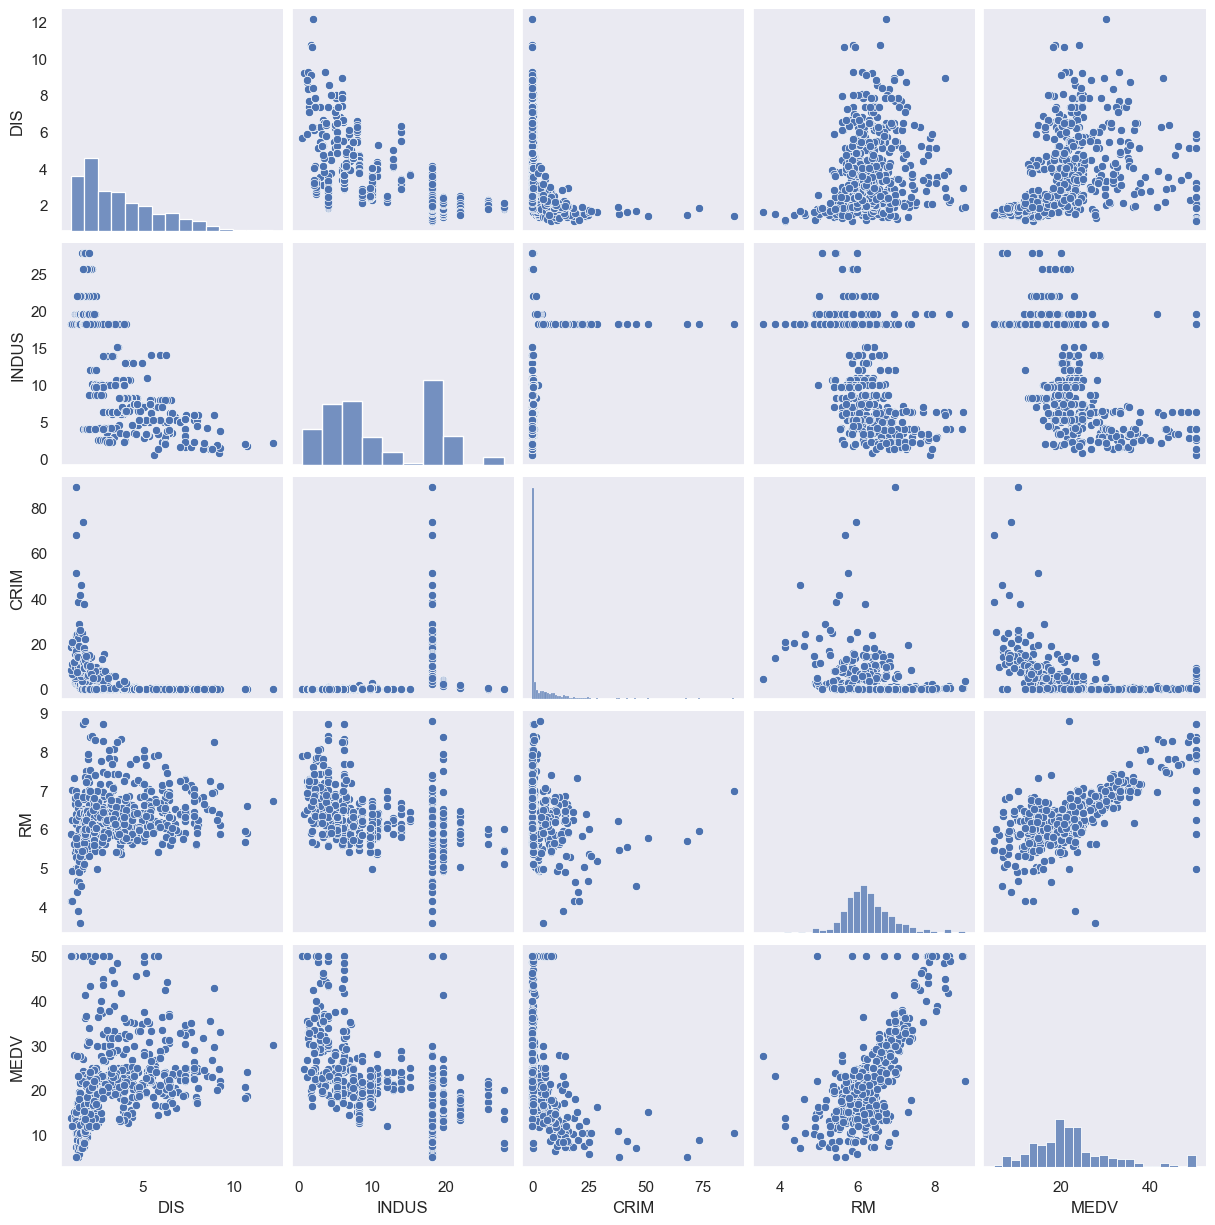

In [ ]:

sns.set_theme(style='whitegrid', context='notebook')
cols = ['DIS','INDUS','CRIM', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5)
plt.show()

Una vez que vemos cómo están correlacionadas las variables de manera visual, es importante usar un método numérico para poder entender las correlaciones. 

In [19]:
import numpy as np

<Axes: >

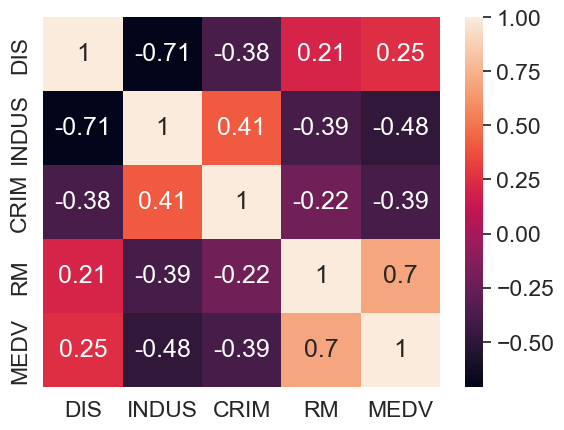

In [32]:
correlation_matriz = np.corrcoef(df[cols].values.T)
sns.set_theme(context='notebook', style='white', font_scale=1.5)
sns.heatmap(data=correlation_matriz, cbar=True, annot=True, xticklabels=cols, yticklabels=cols)

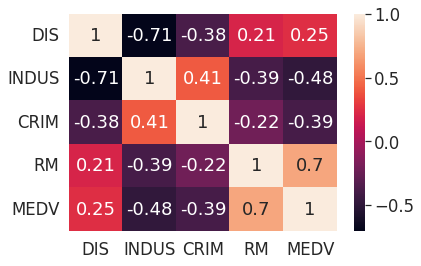

In [ ]:

cm = np.corrcoef(df[cols].values.T)
sns.set_theme(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True,yticklabels=cols,xticklabels=cols)

## Creando el modelo con scikit-learn

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [35]:
X = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

## Análisis de resultados

Text(0.5, 0, 'Promedio de habitaciones [RM]')

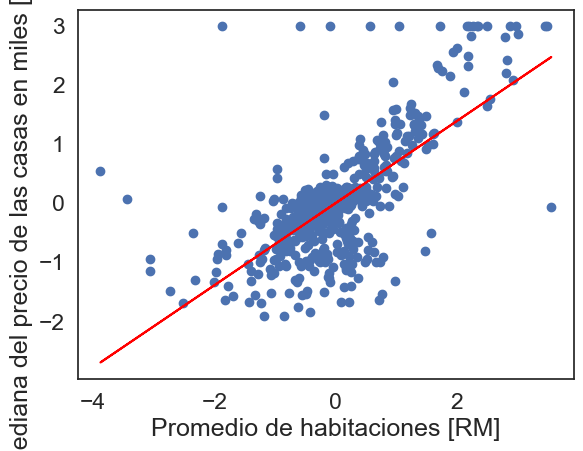

In [37]:
plt.scatter(X_std,y_std)
plt.plot(X_std,slr.predict(X_std), color='Red')
plt.ylabel("Mediana del precio de las casas en miles [MEDV]")
plt.xlabel("Promedio de habitaciones [RM]")

## Generando predicción con el modelo

In [38]:
num_habitaciones = 5
num_habitaciones_std = sc_x.transform(np.array([num_habitaciones]).reshape(-1,1))
print("El precio de una casa con 5 habitaciones en Boston es de ", sc_y.inverse_transform(slr.predict(num_habitaciones_std)))

El precio de una casa con 5 habitaciones en Boston es de  [[10.83992413]]
